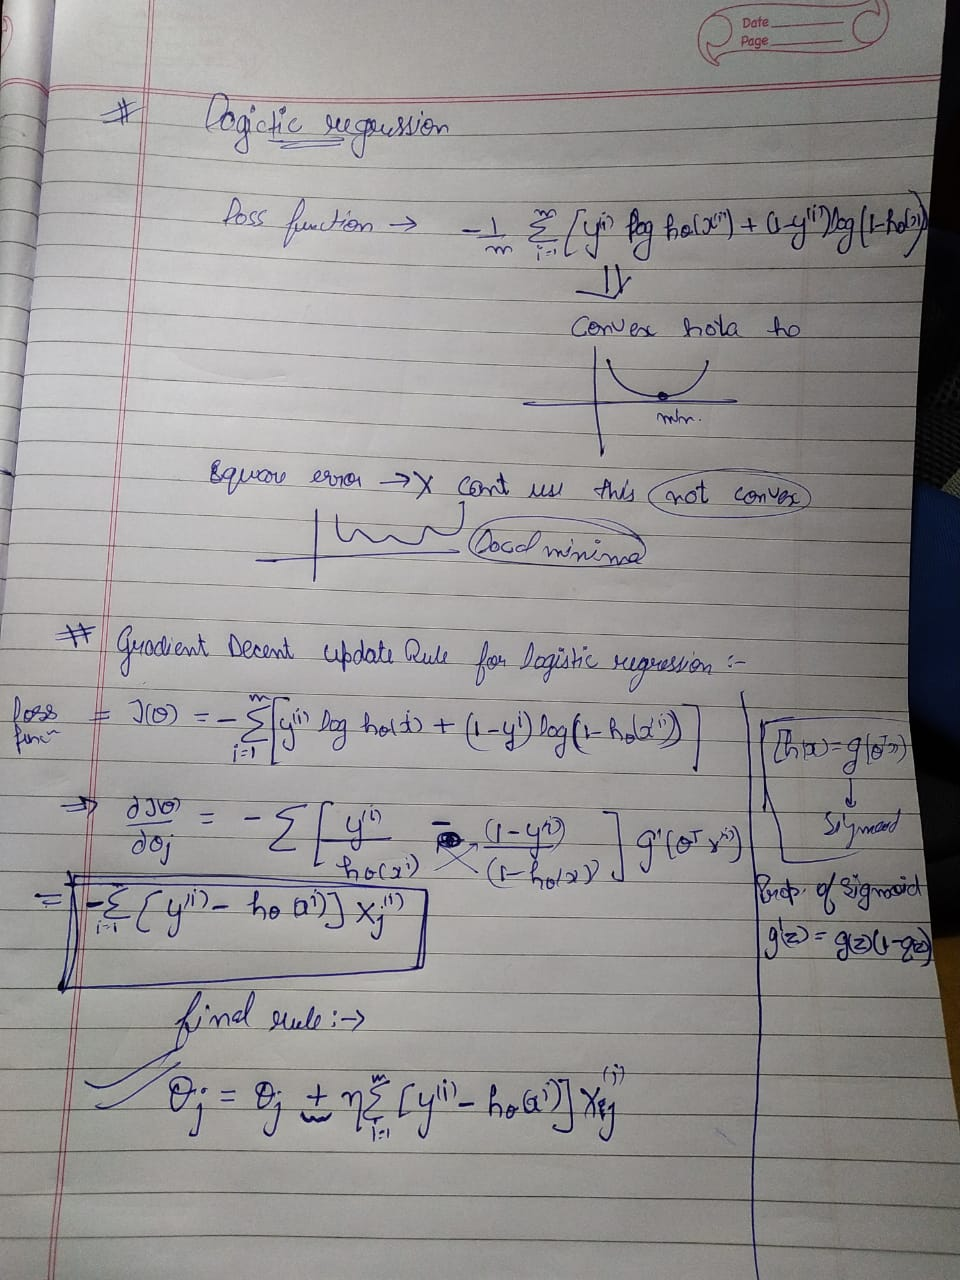

In [ ]:
# Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.style.use('seaborn')

In [51]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


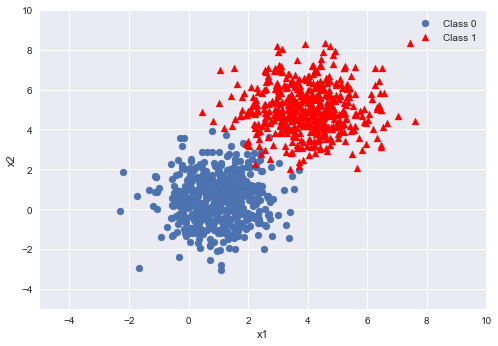

In [63]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
#is data ko combine krna h ab with there label as 0,1 resp.

In [52]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [53]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [54]:
np.random.shuffle(data)
print(data[:10])

[[ 5.17082637  4.7502293   1.        ]
 [ 3.77307302  5.91865289  1.        ]
 [ 1.41870844  5.65433048  1.        ]
 [ 5.65826459  2.07838001  1.        ]
 [ 2.64665024  4.67149106  1.        ]
 [ 4.43894874  7.55667572  1.        ]
 [ 3.09359692  7.19497282  1.        ]
 [ 2.66014861 -0.3061591   0.        ]
 [ 1.5592355  -0.02657503  0.        ]
 [ 3.82478476  4.87710383  1.        ]]


In [55]:
split = int(0.8*data.shape[0])

In [56]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [57]:
#data normalization

X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)

X_train=(X_train-X_mean)/X_std

In [58]:
#shift test data with same mean and std

X_test=(X_test-X_mean)/X_std

In [64]:
def sigmoid(x):
    return (1.0/(1.0 + np.exp(-x)))

def hypothesis(x,theta):
    
    return sigmoid(np.dot(x,theta))

def error(x,y,theta):
    
    hi=hypothesis(x,theta)
    error=-1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
    
    return error

def gradient(x,y,theta):
    
    hi=hypothesis(x,theta)
    grad=-np.dot(x.T,(y-hi))
    m=x.shape[0]
    return grad/m

def gradient_desent(X,y,learning_rate=0.1,max_steps=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    
    for i in range(max_steps):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
    

In [67]:
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))
X_new_train.shape

Y_train=Y_train.reshape((-1,1))

In [77]:
theta,error_list=gradient_desent(X_new_train,Y_train)

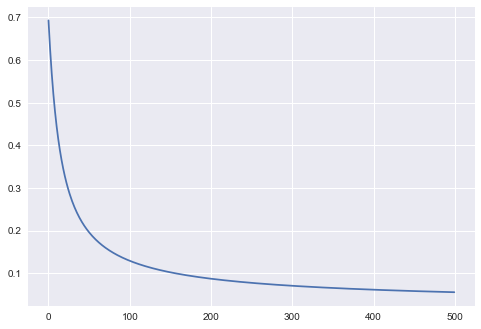

In [78]:
plt.plot(error_list)
plt.show()

In [ ]:
# visualise decision surface

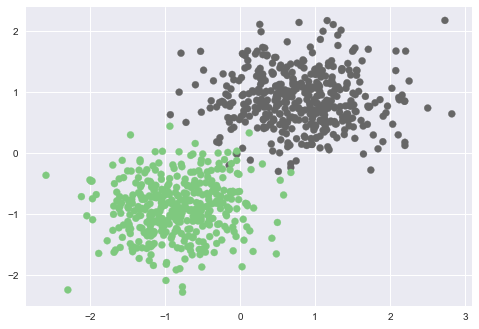

In [73]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1)),cmap=plt.cm.Accent)

In [ ]:
#write x2 in form of x1 so that we can plot

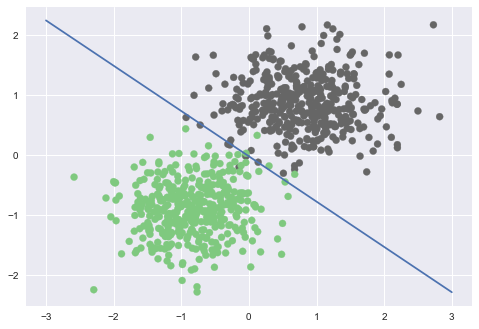

In [79]:
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

In [80]:
theta

array([[0.05601876],
       [2.17827574],
       [2.89098372]])

In [ ]:
#prediction

In [86]:
def predict(x,theta):
    
    confidence = hypothesis(x,theta)
    output=np.zeros(confidence.shape)
    output[confidence>=0.5]=1
    return output.astype('int')

In [87]:
predict(X_new_train,theta)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [88]:
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))
X_new_test.shape

(200, 3)

In [89]:
pred=predict(X_new_test,theta)
pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [92]:
def accuracy(actual,preds):
    actual=actual.astype("int")
    actual=actual.reshape((-1,1))
    acc=np.sum(actual==preds)/actual.shape[0]
    return acc

In [93]:
accuracy(Y_test,pred)

0.99

In [ ]:
# using sklearn

In [ ]:
#challenge

In [ ]:
theta,error_list=gradient_desent(X_new_train,Y_train)

In [99]:
df_train_x=pd.read_csv(r"C:\Users\hp\Desktop\Logistic_X_Train.csv")
df_train_y=pd.read_csv(r"C:\Users\hp\Desktop\Logistic_Y_Train.csv")
df_test=pd.read_csv(r"C:\Users\hp\Desktop\Logistic_X_Test.csv")

In [113]:
X=df_train_x.values
y=df_train_y.values

In [114]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
X.shape

(3000, 4)

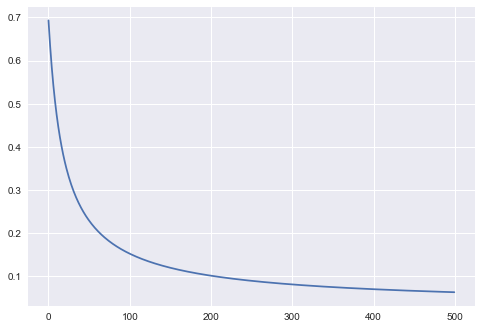

In [115]:
theta,error_list=gradient_desent(X,y)
plt.plot(error_list)
plt.show()

In [116]:
theta

array([[-0.3476416 ],
       [-2.54088671],
       [ 1.38267114],
       [-2.30279121]])

In [118]:
x_test=df_test.values
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))
x_test.shape

(1000, 4)

In [119]:
y_=predict(x_test,theta)

In [120]:
y_[:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [121]:
y_=pd.DataFrame(y_,columns=['label'])
y_.to_csv("logistic.csv",index=False)

In [111]:
mean=df_train_x.mean(axis=0)
std=df_train_x.std(axis=0)

In [112]:
df_train_x=(df_train_x-mean)/std

In [117]:
df_test=(df_test-mean)/std